In [10]:
#from rich import print
import numpy as np
# numpy 1.25
# 基本对象： ndarray 对应向量或者矩阵
# 1. 构造器


data = np.array([[1, 2], [3, 4], [5, 6]])
print(type(data))

print(data.dtype)
print(data.ndim)
print(data.shape)
print(data.size)




<class 'numpy.ndarray'>
int64
2
(3, 2)
6
[[0 0 0]
 [0 0 0]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[4607182418800017408 4607182418800017408 4607182418800017408]
 [4607182418800017408 4607182418800017408 4607182418800017408]]


In [45]:
# 其他的arrary构造方法

print(np.zeros((2,3),dtype=int)) # 零矩阵
print(np.ones((2,3), dtype=float)) # 1矩阵
print(np.empty((2,3),dtype=int)) # 空矩阵
print(np.full((3,2), fill_value=5.4)) # 创建一个给定数值的arrary

print(np.arange(1,10,2)) # 等差数列,给定切割的步长
print(np.linspace(1,10,2)) # 等差数列,给定切割后的次数




[[0 0 0]
 [0 0 0]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[4607182418800017408 4607182418800017408 4607182418800017408]
 [4607182418800017408 4607182418800017408 4607182418800017408]]
[[5.4 5.4]
 [5.4 5.4]
 [5.4 5.4]]
[1 3 5 7 9]
[ 1. 10.]


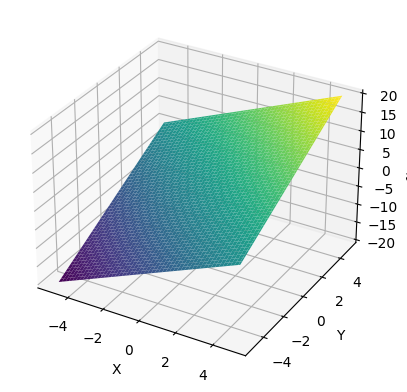

In [32]:
# 生成更高维的线性空间
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义函数
def f(x, y):
    return x * 2 + y * 2

# 创建x和y的值
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# 生成网格
X, Y = np.meshgrid(x, y)

# 在网格上计算函数值
Z = f(X, Y)

# 创建3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# 设置图形标题和坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

# 显示图形
plt.show()


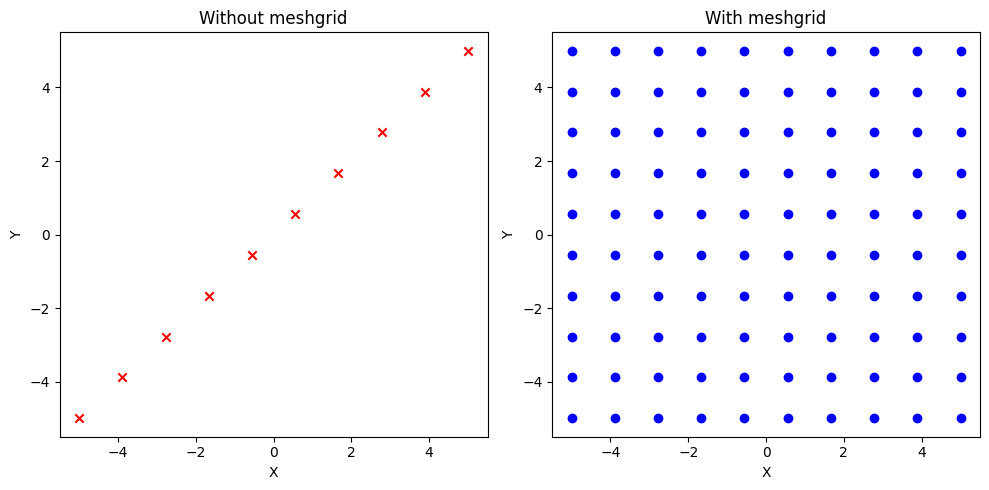

In [37]:
# 创建x和y的值
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

# 生成网格
X, Y = np.meshgrid(x, y)

# 创建两个子图
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 在第一个子图上直接使用x和y绘制散点图
axs[0].scatter(x, y, color='r', marker='x')
axs[0].set_title("Without meshgrid")
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# 在第二个子图上使用meshgrid生成的X和Y绘制散点图
axs[1].scatter(X, Y, color='b', marker='o')
axs[1].set_title("With meshgrid")
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

# 显示图形
plt.tight_layout()
plt.show()



In [1]:
import sympy as sp

sp.init_printing(use_latex=True)

# sympy的基础对象是Basic类,它包含子类Symbol类,



In [9]:
# 符号变量
x = sp.Symbol('x', real=True, positive=True, finite=True) # 有限正实数
sp.sqrt(x**2) 

In [28]:
# 符号常量
sp.Integer(10)
sp.Float(2.11)

x10 = sp.simplify(10)

x10**100

x2p11 = sp.simplify(2.11)
sp.factorial(100)

x2p11

sp.pi
sp.E
sp.oo

In [41]:
# 构造抽象函数 Function类
f = sp.Function('f')(x)
f.free_symbols
h = sp.Lambda(x,x**2)
h(5*x)

In [66]:
#表达式
expr = 2 * (x**2 - x) - x * (x + 1) + 2*x
expr.args
## 操作表达式
# 化简
expr.simplify()
# 展开
expr.expand()
# 因式分解
expr.factor()
# 合并同类项
expr.collect(x)



In [61]:
# 替换
y, z = sp.symbols('y z')
(x + y).subs(x, y) #将x替换为y

##同时替换多个,注意是同时不是顺序替代
sp.sin(x * z).subs({z: sp.exp(y), x: y, sp.sin: sp.cos})



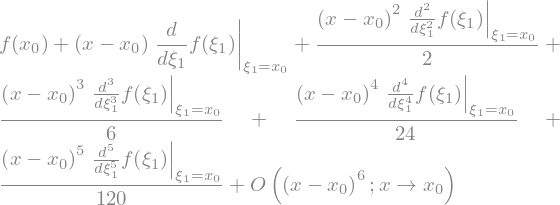

In [73]:
#函数展开
x0 = sp.Symbol("{x_0}")
f = sp.Function("f")(x)
sp.series(f, x, x0) #0点展开

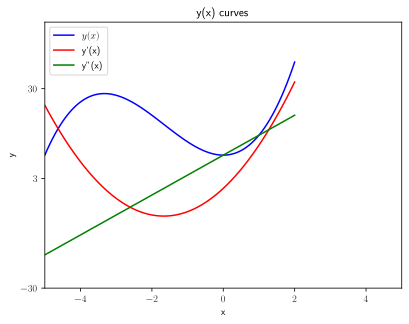

In [11]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
# 科学绘图使用Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['text.usetex'] = True
# 绘制y(x) = x^3+5x^2+10在[-5,2]上的图像

x = np.linspace(-5,2,100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x 
y3 = 6*x + 10
fig, ax = plt.subplots()

#折线图
ax.set_title("y(x) curves")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, y1, color="blue", label=r"$y(x)$")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y”(x)")
ax.legend(loc=2)
ax.set_ylim(-20,50)
ax.set_xlim(-5,5)
ax.set_yticks([-30,3,30])




In [2]:
# 方程求解

from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt



## 线性方程及方程组
我们常常需要一个有唯一解的线性方程系统, 需要保证系数矩阵满秩full rank

由于计算机的浮点数是近似的，因此还需要保证矩阵的条件cond接近1

$$2x_{1}+3x_{2}=4 \\ 5x_{1}+4x_{2}=3$$

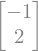

In [28]:


# sympy
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])
A.rank()
sympy.N(A.condition_number())
A.norm()



# 解法1： 直接求解，逆矩阵
# 解法2： LU分解 A=LU （推荐）

A.LUdecomposition()
A.LUsolve(b)


In [30]:
# scipy 近似解
A = np.array([[2,3],[5,4]])
b = np.array([4,3])

np.linalg.matrix_rank(A)
np.linalg.cond(A)
np.linalg.norm(A)
la.lu(A)
la.solve(A,b)

array([-1.,  2.])

In [ ]:
p = sympy.symbols("p", positive=True)